In [1]:
import preprocessFERplus as preprocess
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data = preprocess.FERdata(
    'challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv'
)


reading csvfile from challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv


In [3]:
result = data.get_df(mode='GNN',
                     sample=True,
                     sample_size=100,
                     drawlandmarks=True,
                     with_img=True)


Generate df with config
 mode:GNN
 drawlandmarks:True
 mapping:False
 colormap:GRAY
 sample:True
 sample_size:100
Prepare data to img


100%|██████████| 300/300 [00:00<00:00, 702.80it/s]


Getting landmarks with mediapipe FaceMesh


100%|██████████| 300/300 [00:09<00:00, 30.91it/s]

Distribution of Train: 
3    27
6    23
4    15
0    11
2    10
5    10
Name: target, dtype: int64
Distribution of Validation: 
3    24
4    17
0    15
6    13
5    11
2     9
1     1
Name: target, dtype: int64
Distribution of Test 
3    26
5    18
2    17
6    14
4    13
0     9
1     1
Name: target, dtype: int64


In [4]:
result.head(10)

,usage,feature,target,edge_index,draw_img,img
0,train,"[[0.4538262188434601, 0.8118041157722473, -0.0...",6,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[148, 148, 148], [96, 96, 96], [84, 84, 84],...","[[148, 96, 84, 98, 28, 28, 29, 28, 32, 52, 48,..."
1,train,"[[0.5148314237594604, 0.7925891280174255, -0.0...",6,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[14, 14, 14], [13, 13, 13], [10, 10, 10], [1...","[[14, 13, 10, 10, 11, 10, 10, 7, 6, 7, 7, 8, 7..."
2,train,"[[0.3953710198402405, 0.7060569524765015, -0.0...",2,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[33, 33, 33], [59, 59, 59], [24, 24, 24], [2...","[[33, 59, 24, 25, 33, 11, 62, 60, 20, 98, 53, ..."
3,train,"[[0.5755037069320679, 0.7391787767410278, -0.0...",3,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[23, 23, 23], [20, 20, 20], [16, 16, 16], [1...","[[23, 20, 16, 18, 27, 45, 71, 85, 112, 139, 15..."
4,train,"[[0.5077651739120483, 0.6844893097877502, -0.1...",6,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[130, 130, 130], [131, 131, 131], [131, 131,...","[[130, 131, 131, 131, 131, 91, 20, 3, 4, 5, 6,..."
5,train,"[[0.5418622493743896, 0.6679669618606567, -0.1...",3,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[99, 99, 99], [112, 112, 112], [118, 118, 11...","[[99, 112, 118, 113, 113, 114, 114, 113, 121, ..."
6,train,"[[0.5021376609802246, 0.6477794051170349, -0.0...",0,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[192, 192, 192], [217, 217, 217], [216, 216,...","[[192, 217, 216, 222, 206, 209, 205, 183, 181,..."
7,train,"[[0.4687150716781616, 0.8091539144515991, -0.0...",3,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[204, 204, 204], [211, 211, 211], [206, 206,...","[[204, 211, 206, 203, 193, 177, 167, 161, 161,..."
8,train,"[[0.5812462568283081, 0.6499139070510864, -0.0...",3,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [9, 9, 9], ...","[[0, 0, 0, 9, 17, 14, 15, 6, 12, 18, 24, 32, 6..."
9,train,"[[0.22255893051624298, 0.6457899808883667, -0....",6,"[(18, 17), (82, 38), (8, 9), (456, 248), (167,...","[[[141, 141, 141], [139, 139, 139], [136, 136,...","[[141, 139, 136, 135, 132, 133, 133, 131, 128,..."


In [735]:
sample = result.iloc[2]

In [736]:
FERclassName = [
    'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'
]
label = FERclassName[sample['target']]

In [737]:
img = sample['img']

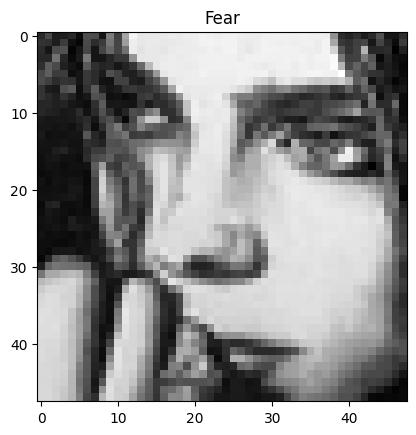

In [738]:
plt.title(label)
plt.imshow(img, cmap='gray')

In [739]:
mesh_img = sample['draw_img']

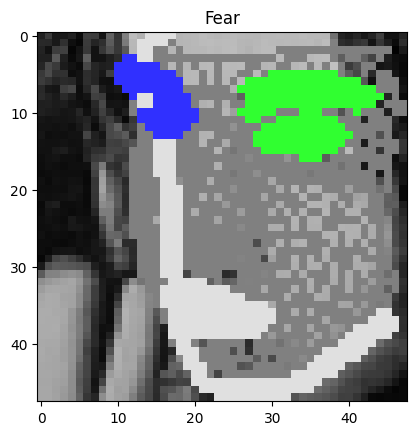

In [740]:
plt.title(label)
plt.imshow(mesh_img)

In [741]:
mesh = sample['feature']

In [742]:
mesh = np.array(mesh).reshape(478, 3)


In [743]:
def plot3dmesh(mesh):
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_trisurf(mesh[:, 0],
                    mesh[:, 1],
                    mesh[:, 2],
                    cmap='viridis',
                    edgecolor='none')
    ax.view_init(270, 180, 90)
    ax.set(title=label, xlabel='X', ylabel='Y', zlabel='Z')


In [772]:
def re_pos(mesh):
    print(f'shift from: {mesh[1]}')
    origin = mesh[1] - np.array([0, 0, 0])
    mesh = mesh - origin
    return mesh

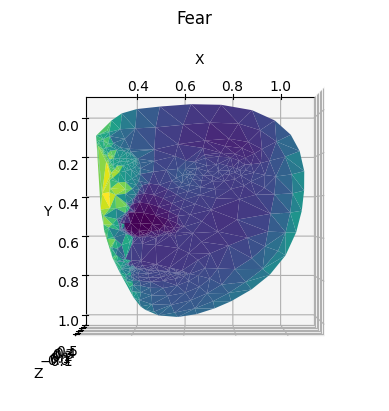

In [773]:
plot3dmesh(mesh)

shift from: [ 0.39921802  0.56582898 -0.16132657]


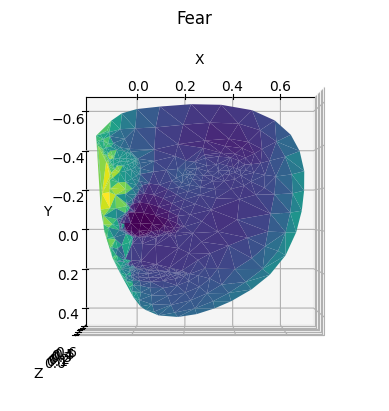

In [774]:
plot3dmesh(re_pos(mesh))

[Text(0.5, 0.92, 'Fear'),
 Text(0.5, 0, 'X'),
 Text(0.5, 0.5, 'Y'),
 Text(0.5, 0, 'Z')]

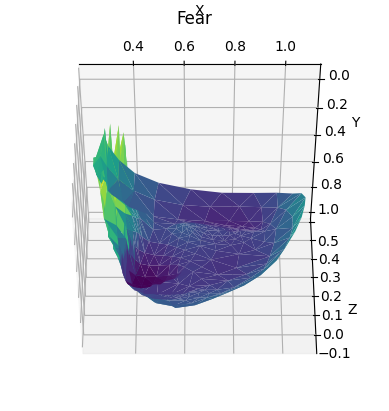

In [775]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(mesh[:, 0],
                mesh[:, 1],
                mesh[:, 2],
                cmap='viridis',
                edgecolor='none')
ax.view_init(320, 270, 0)
ax.set(title=label, xlabel='X', ylabel='Y', zlabel='Z')


In [796]:
import numpy as np
import matplotlib.pyplot as plt
import sys


def unit_vector(vector):
    """ Returns the unit vector of the vector."""
    return vector / np.linalg.norm(vector)


def angle_between(v1, v2):
    """Returns the angle in radians between vectors x,y,z and u,v,w"""
    return np.arccos(
        np.clip(np.dot(unit_vector(v1), unit_vector(v2)), -1.0, 1.0))


def xyz_orient(vector, x, y, z, u, v, w):
    """Rotates 3-D vector around x, y, and z axes"""
    R = np.matmul(Rz(w), np.matmul(Ry(v), Rx(u)))
    # print(R)
    return vector


def Rx(theta):
    return np.matrix([[1., 0., 0.], [0., np.cos(theta), -np.sin(theta)],
                      [0., np.sin(theta), np.cos(theta)]])


def Ry(theta):
    return np.matrix([[np.cos(theta), 0., np.sin(theta)], [0., 1., 0.],
                      [-np.sin(theta), 0., np.cos(theta)]])


def Rz(theta):
    return np.matrix([[np.cos(theta), -np.sin(theta), 0.],
                      [np.sin(theta), np.cos(theta), 0.], [0., 0., 1.]])


shift from: [ 0.39921802  0.56582898 -0.16132657]
[]


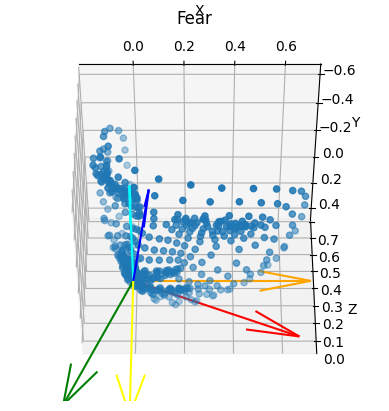

In [803]:
def rotate_mesh(mesh):
    mesh = re_pos(mesh)
    p0 = mesh[1]
    p1 = mesh[5]
    p2 = mesh[44]
    p3 = mesh[274]
    v1 = p2 - p1
    v2 = p3 - p1
    v3 = p0 - p1
    v4 = p0 - mesh[4]
    z = unit_vector(np.cross(v1, v2))
    ref = unit_vector(np.cross(v3, v4))
    y = unit_vector(np.cross(z, ref))
    x = unit_vector(np.cross(y, z))
    w = np.array([0., 0., -1.])
    v = np.array([0., -1., 0.])
    u = np.array([1., 0., 0.])
    angle = []
    print(angle)
    # mesh = xyz_orient(mesh, x, y, z, u, v, w)
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter3D(mesh[:, 0], mesh[:, 1], mesh[:, 2])
    ax.quiver(0,
              0,
              0,
              u[0],
              u[1],
              u[2],
              length=0.7,
              color='orange',
              normalize=True)
    ax.quiver(0,
              0,
              0,
              v[0],
              v[1],
              v[2],
              length=0.7,
              color='cyan',
              normalize=True)
    ax.quiver(0,
              0,
              0,
              w[0],
              w[1],
              w[2],
              length=0.7,
              color='yellow',
              normalize=True)
    ax.quiver(0,
              0,
              0,
              y[0],
              y[1],
              y[2],
              length=0.7,
              color='blue',
              normalize=True)
    ax.quiver(0,
              0,
              0,
              z[0],
              z[1],
              z[2],
              length=0.7,
              color='green',
              normalize=True)
    ax.quiver(0,
              0,
              0,
              x[0],
              x[1],
              x[2],
              length=0.7,
              color='red',
              normalize=True)
    # ax.view_init(270, 180, 90)
    ax.view_init(320, 270, 0)
    ax.set(title=label, xlabel='X', ylabel='Y', zlabel='Z')


rotate_mesh(mesh)